In [ ]:
"""
Purpose: To merge 


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-29 15:23:18,619 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 15:23:18,620 - settings - Setting database.user to celiib
INFO - 2021-04-29 15:23:18,621 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 15:23:18,625 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-29 15:23:18,626 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 15:23:18,637 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-29 15:23:19,066 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 15:23:19,069 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 15:23:19,070 - settings - Setting database.user to celiib
INFO - 2021-04-29 15:23:19,070 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 15:23:19,071 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 15:23:19,072 - settings - Setting database.user to celiib
INFO - 2021-04-29 15:23:19,073 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 15:23:19,076 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 15:23:19,726 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-29 15:23:19,883 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-29 15:23:19,884 - settings - Setting database.user to celiib
INFO - 2021-04-29 15:23:19,885 - settings - Setting database.password to newceliipass
INFO - 2021-04-29 15:23:19,887 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-29 15:23:20,305 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru

# Downloading the Neuron

In [5]:
segment_id = 864691136194042326
minnie.Decomposition() & f"segment_id = {segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691136194042326,0,0.25,30.00,7,0,1,=BLOB=,543348,1100473,0,0,0,0,1,5,134,92,5711902.431454649,3489105.382868428,24117.997,87.607,87.607,543.496,482.187,1643,0.00028764496938046916,12.261194029850746,3062061.696,52,0.0005365665891534016,31.596,495451480854.54834,172336953.29870287,86740.18626896814,161803.232606894,9527913093.356699,5274.2019


In [6]:
neuron_obj = du.fetch_neuron_obj_manual(segment_id,border_validation=True)

Decompressing Neuron in minimal output mode...please wait


# Filtering Using the Current Function

In [7]:
import proofreading_utils as pru
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        verbose = True,
                        plot_score=False)


--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': 75, 'width_diff_perc': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 8, 'match_method': 'best_match'}




 ----- Working on coordinate 0: [633369.46396577 642628.37375774 904286.15810562]--------
winning_downstream = None,error_downstream = [] 
coordinate [633369.46396577 642628.37375774 904286.15810562] had error branches []--------


 ----- Working on coordinate 1: [655835.01357908 654071.79933467 886661.69334533]--------
winning_downstream = 9,error_downstream = [10 18] 
coordinate [655835.01357908 654071.79933467 886661.69334533] had error branches [10 18]--------


 ----- Working on coordinate 2: [703150.15902442 700224.74801046 786377.94326672]--------
winning_downstream = 48,error_downstream = [46 44] 
coordinate [703150.1590


--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = thick_t_merge
function __name__ = filter_away_thick_t_merge
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 4:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': None, 'allow_axon_double_back_angle_with_top_width_min': 140, 'skeletal_len


--- Working on filter 5:
function = axon_fork_divergence
function __name__ = filter_away_small_axon_fork_divergence
function arguments = {'divergence_threshold_mean': 165}


limb_branch_dict_to_cancel = {}



 ---- Total time for applying filter: 100.33262729644775 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 54, # error synapses  = 367, # error presyns = 25
For postsyn: # valid synapses = 3007, # error synapses  = 24, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 54
n_errored_syn_ids_presyn = 367
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24

--- Finished Part 3: Generating Validation Dataframe -----


Segment Id = 864691136194042326
Postsyn counts:
TP:2982
TN:7
FP:25
FN:17
Presyn counts:
TP:42
TN:315
FP:12
FN:27


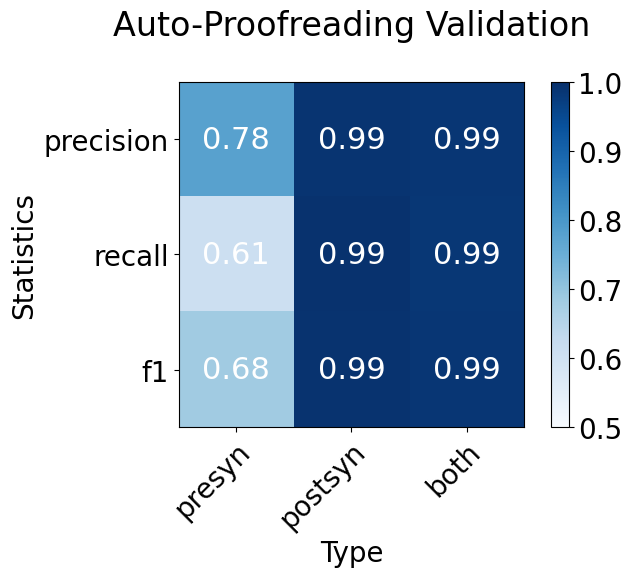

In [8]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [9]:
vu.plot_validation_synapses(segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


In [19]:
crossover_coordinates[5]

array([713252.41248611, 668208.00353725, 834130.63609803])

In [21]:
good_kissing_coordinates = [np.array([705796.38338002, 711368.54932521, 761452.07011226]),
                            np.array([713252.41248611, 668208.00353725, 834130.63609803])]

In [309]:
import error_detection as ed
winning_downstream,error_downstream = ed.high_degree_upstream_match(limb_obj,
                          coordinate = good_kissing_coordinates[0],
                        plot_intermediates = True,
                        plot_match_intermediates = True,
                          verbose=True)
print(winning_downstream,error_downstream)

For test node 45, sibling nodes were: [58 66]
overlap = [58 66]
With test node equal to the downstream node
upstream = 61, downstream_nodes = [58 66 45]
branches_at_coord = [45 58 61 66]
widths_in_branches = [82.11199534 61.89983121 75.43752764 46.40518361]
coordinate_branches = [45, 58, 61, 66]
45 = red
58 = aqua
61 = purple
66 = green


Angle between 45 and 58 = 156.78 
Angle between 45 and 61 = 25.51 
Angle between 45 and 66 = 21.38 
Angle between 58 and 61 = 45.5 
Angle between 58 and 66 = 4.13 
Angle between 61 and 66 = 134.91 
Final Matches = [[45, 61], [45, 66], [58, 61], [58, 66]], Final Matches Angle = [25.51, 21.38, 45.5, 4.13]
Aligned Skeleton Parts


matched_edges = [[45, 61], [45, 66], [58, 61], [58, 66]]matched_edges_angles = [25.51, 21.38, 45.5, 4.13]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [(45, 61), (45, 66), (58, 61), (58, 66)], Remaining Nodes = [45, 58, 61, 66]
edges_to_remove_by_width = []
Step 2: Edges after widht mismatch
Remaining Edges = [(45, 61), (45, 66), (58, 61), (58, 66)], Remaining Nodes = [45, 58, 61, 66]
--Working on edge [45 61]--
--Working on edge [45 66]--
--Working on edge [58 61]--
--Working on edge [58 66]--
Edge [58 66] is matches definite match threshold with: 
Edge Buffer of 17.25 (angle_buffer = 15)
Edge Angle of 4.13 (match_threshold = 45)
Step 4: Definite Edges
Remaining Edges = [(45, 61), (58, 66)], Remaining Nodes = [45, 58, 61, 66]
upstream_subgraph = [61 45]
Possible Connections = [45], angles = [25.51]
Deleting the following nodes because above match threshold while 1 are: []
Step 5: Removing worst case edges
Remaining Edges = [(45, 61), (58, 66)]
Using best matc

# Partition Function

In [391]:
G.edges()

EdgeView([(81, 94), (83, 93), (83, 100), (93, 94), (94, 100)])

In [390]:
ret_G = ed.cut_kissing_graph_edges(G,limb_obj,
    kiss_check_bbox_longest_side_threshold = 450,
    coordinate = good_kissing_coordinates[1],
    offset=1500,
    comparison_distance = 2000,
    plot_offset_skeletons = True,
    plot_source_sink_vertices = False,
    plot_cut_vertices = True,
    plot_cut_bbox = True,
    verbose = True
                )

branches = [ 81  83  93  94 100]
unique_comb = [[81, 83], [81, 93], [81, 94], [81, 100]]
81:purple
83:aqua
93:green
94:red
100:purple


skeleton_offset_points_dict = {81: array([711596.05572653, 669874.28769926, 832807.30882245]), 83: array([713518.98775759, 670542.19047425, 836010.00062444]), 93: array([713532.55701768, 666263.39913517, 831421.83304927]), 94: array([714231.60826384, 670855.29225146, 835299.2193177 ]), 100: array([714181.59433497, 665240.03128078, 833288.51452666])}
node_partitions
choose_k_options = [2]
partition 0: [[81, 83], [93, 94, 100]]
partition 1: [[81, 93], [83, 94, 100]]
partition 2: [[81, 94], [83, 93, 100]]
partition 3: [[81, 100], [83, 93, 94]]
partition 4: [[83, 93], [81, 94, 100]]
partition 5: [[83, 94], [81, 93, 100]]
partition 6: [[83, 100], [81, 93, 94]]
partition 7: [[93, 94], [81, 83, 100]]
partition 8: [[93, 100], [81, 83, 94]]
partition 9: [[94, 100], [81, 83, 93]]
Working on partition 0: [81, 83],[93, 94, 100]
cut_weight = 20000
nodes_in_edge_cut = [1599  893 1599  960]
G_cut_edges = None
Could not find a cut edge for the source and sink coordinates: returning None
Output was Non

cut_bbox_volume = 1909969.2164486006, cut_bbox_longest_side = 261.7612477694638


** triggered kiss check cut becuase cut_bbox_longest_side = 261.7612477694638***
Edges after removing partition = [[ 81.    94.    62.5 ]
 [ 83.    93.    21.67]
 [ 83.   100.     8.07]]
Working on partition 3: [81, 100],[83, 93, 94]
cut_weight = 20000
nodes_in_edge_cut = [1599  476 1599  893]
G_cut_edges = None
Could not find a cut edge for the source and sink coordinates: returning None
Output was None so continuing
Working on partition 4: [83, 93],[81, 94, 100]
cut_weight = 27
nodes_in_edge_cut = [  41  414   41  997   88 1200   88 1330   88 1368  101  222  101 1032
  140  997  148 1368  148 1512  238 1360  238 1512  380  142  380  222
  380  405  457  997  457 1360  941 1150 1046  658 1046 1032 1343 1200
 1465 1150 1465 1200 1491  414 1491  658 1568  405 1568 1150]
G_cut_edges = [[  41  414]
 [  41  997]
 [  88 1200]
 [  88 1330]
 [  88 1368]
 [ 101  222]
 [ 101 1032]
 [ 140  997]
 [ 148 1368]
 [ 148 1512]
 [ 238 1360]
 [ 238 1512]
 [ 380  142]
 [ 380  222]
 [ 380  405]
 [ 457  997

cut_bbox_volume = 64787800.242149636, cut_bbox_longest_side = 970.1968713370152


Working on partition 5: [83, 94],[81, 93, 100]
cut_weight = 20000
nodes_in_edge_cut = [1599  960 1599 1459]
G_cut_edges = None
Could not find a cut edge for the source and sink coordinates: returning None
Output was None so continuing
Working on partition 6: [83, 100],[81, 93, 94]
cut_weight = 13
nodes_in_edge_cut = [ 397   28  397 1150  405 1150  658   28  658  414  658 1136 1491   41
 1491  140 1491  414 1521  140 1568  140 1568  941 1568 1150]
G_cut_edges = [[ 397   28]
 [ 397 1150]
 [ 405 1150]
 [ 658   28]
 [ 658  414]
 [ 658 1136]
 [1491   41]
 [1491  140]
 [1491  414]
 [1521  140]
 [1568  140]
 [1568  941]
 [1568 1150]]
# 0f cut points = 13


cut_bbox_volume = 3814045.1104618073, cut_bbox_longest_side = 411.6791600298602


** triggered kiss check cut becuase cut_bbox_longest_side = 411.6791600298602***
Edges after removing partition = [[ 81.    94.    62.5 ]
 [ 83.   100.     8.07]]
Working on partition 7: [93, 94],[81, 83, 100]
cut_weight = 20000
nodes_in_edge_cut = [1599  375 1599 1459]
G_cut_edges = None
Could not find a cut edge for the source and sink coordinates: returning None
Output was None so continuing
Working on partition 8: [93, 100],[81, 83, 94]
cut_weight = 25
nodes_in_edge_cut = [  28  658   28 1055   28 1136   88 1330   88 1368  148 1368  148 1512
  238 1360  238 1512  397  145  397  658  405  142  405  380  457  140
  457  997  457 1360  655  142  655  145  655 1266  941  140 1200 1055
 1200 1330 1568  140 1568  380 1568 1521]
G_cut_edges = [[  28  658]
 [  28 1055]
 [  28 1136]
 [  88 1330]
 [  88 1368]
 [ 148 1368]
 [ 148 1512]
 [ 238 1360]
 [ 238 1512]
 [ 397  145]
 [ 397  658]
 [ 405  142]
 [ 405  380]
 [ 457  140]
 [ 457  997]
 [ 457 1360]
 [ 655  142]
 [ 655  145]
 [ 655 1266]
 [ 

cut_bbox_volume = 38170154.96768996, cut_bbox_longest_side = 810.7869925238192


Working on partition 9: [94, 100],[81, 83, 93]
cut_weight = 20000
nodes_in_edge_cut = [1599  476 1599 1459]
G_cut_edges = None
Could not find a cut edge for the source and sink coordinates: returning None
Output was None so continuing


# Fleshing Out Crossover

In [311]:
import axon_utils as au

In [388]:
limb_obj = neuron_obj[neuron_obj.axon_limb_name]
coordinate = good_kissing_coordinates[1]
upstream_branch = None
downstream_branches = None

#arguments for the angle checking
offset=1500
comparison_distance = 2000
worst_case_match_threshold = 65
plot_intermediates = True
plot_match_intermediates = False

#args for width matching
width_diff_max = 75#np.inf,100,
width_diff_perc = 60

#args for definite pairs
match_threshold = 45
angle_buffer = 15

max_degree_to_resolve = 6
max_degree_to_resolve_wide = 8
max_degree_to_resolve_width_threshold = 200

axon_dependent = True

width_max = 170

#args for picking the final winner
match_method = "best_match" #other option is "best_match"

remove_short_thick_endnodes = True
short_thick_endnodes_to_remove = None
min_degree_to_resolve = 4

kiss_check = True
kiss_check_bbox_longest_side_threshold = 450

verbose = True


"""
Purpose: To figure out which downstream
node is the most likely continuation of the 
upstream node

Pseudocode: 
0) Determine branches touching coordinate and which node is the upstream node and which are downstream
1) Compute the skeletal angles between all branches
2) Create a skeletal graph where make the edges between
all nodes that meet the worst case scenario
3) Compute the width difference between all branches connected by an edge
Remove all the edges that violate the width difference threshold
4) Create definite pairs by looking for edges that meet:
- match threshold
- have buffer better than other edges
** for those edges, eliminate all edges on those
2 nodes except that edge

5) If the upstream node has at least one valid 
match then eliminate others above the match threshold

6) Get a subgraph that includes the upstream node:
if there are other nodes in the group use on of the following to determine winner
    a) best match
    b) least sum angle

7) Return the winning edge, and optionally all of the other
downstream nodes that are errored out

"""


#0) Determine which node is the upstream node and which are downstream
if upstream_branch is None or downstream_branches is None:
    branches_at_coord = nru.find_branch_with_specific_coordinate(limb_obj,coordinate)

    upstream_branch, downstream_branches = nru.classify_upstream_downsream(limb_obj,
                               branch_list = branches_at_coord,
                                verbose = verbose)
else:
    branches_at_coord = np.hstack([downstream_branches,[upstream_branch]])

if verbose:
    print(f"branches_at_coord = {branches_at_coord}")


"""
4/24 Addition: Will remove the short thick axon endnodes
"""
if remove_short_thick_endnodes:
    if short_thick_endnodes_to_remove is None:
        short_thick_endnodes_to_remove = au.short_thick_branches_from_limb(limb_obj,
                             verbose = False)
    branches_at_coord = np.setdiff1d(branches_at_coord,short_thick_endnodes_to_remove)

if len(branches_at_coord) < min_degree_to_resolve:
    if verbose:
        print(f"Number of branches ({len(branches_at_coord)}, aka branches_at_coord = {branches_at_coord}) was less than min_degree_to_resolve ({min_degree_to_resolve}) so returning no error branches")
    #return None,np.array([])
    raise Exception("Returned")

# -- end of short thick addition --------


if max_degree_to_resolve_wide is not None:
    up_width = au.axon_width(limb_obj[upstream_branch])
    if up_width > max_degree_to_resolve_width_threshold:
        max_degree_to_resolve = max_degree_to_resolve_wide
        print(f"Changing max_degree_to_resolve = {max_degree_to_resolve_wide} because upstream width was {up_width} ")

if len(branches_at_coord) > max_degree_to_resolve:
    if verbose:
        print(f"Number of branches ({len(branches_at_coord)}) was more than max_degree_to_resolve ({max_degree_to_resolve}) so returning all downstream as error branches")
    #return None,branches_at_coord
    raise Exception("Returned")

widths_in_branches = np.array([au.axon_width(limb_obj[b]) for b in branches_at_coord])
if verbose:
    print(f"widths_in_branches = {widths_in_branches}")

widths_in_branches = widths_in_branches[widths_in_branches != 0]

if width_max is not None:
    if len(widths_in_branches[widths_in_branches>width_max]) == len(widths_in_branches):
        if verbose:
            print(f"Returning No errors because widths are too thick for skeletons to be trusted")
        #return None,[]
        raise Exception("Returned")

if axon_dependent:
    for b in branches_at_coord:
        if "axon" not in limb_obj[b].labels:
            if verbose:
                print(f"Returning No errors because not all branches were axons")
            #return None,[]
            raise Exception("Returned")

#1) Compute the skeletal angles between all branches
matched_edges, matched_edges_angles = ed.matched_branches_by_angle_at_coordinate(limb_obj,
                                        coordinate,
                                           coordinate_branches = branches_at_coord,
                                        offset=offset,
                                        comparison_distance = comparison_distance,
                                        match_threshold = worst_case_match_threshold,
                                        verbose = verbose,
                                        plot_intermediates = plot_intermediates,
                                        plot_match_intermediates = plot_match_intermediates,
                                        )
if verbose:
    print(f"matched_edges = {matched_edges}"
          f"matched_edges_angles = {matched_edges_angles}")



# 2) Create a skeletal graph where make the edges between
# all nodes that meet the worst case scenario

G = nx.Graph()
G.add_nodes_from(branches_at_coord)
G.add_weighted_edges_from([k+[v] for k,v in zip(matched_edges,matched_edges_angles)])

if verbose:
    print(f"Step 2: Edges with worst case scenario matching = {worst_case_match_threshold}")
    print(f"Remaining Edges = {G.edges()}, Remaining Nodes = {G.nodes()}")
#     nx.draw(G,with_labels=True)
#     plt.show()


"""
3) Compute the width difference between all branches connected by an edge
Remove all the edges that violate the width difference threshold
"""


edges_to_remove_by_width = []
for e in G.edges():
    b1,b2 = e
    b1_width = au.axon_width(limb_obj[b1])
    b2_width = au.axon_width(limb_obj[b2])    
    width_difference = np.abs(b1_width-b2_width)

    if width_diff_perc is not None:
        width_diff_max_perc = width_diff_perc*np.max([b1_width,b2_width])/100
        #print(f"Computed width_diff_max as {width_diff_max_perc} using width_diff_perc = {width_diff_perc} and width_diff_max = {width_diff_max}")
        if width_diff_max is not None:
            width_diff_max = np.max([width_diff_max_perc,width_diff_max])

            #print(f"The maximum width chosen was {width_diff_max}")
        else:
            width_diff_max = width_diff_max_perc

    if width_difference > width_diff_max:
        if verbose:
            print(f"Removing edges {e} because width difference {width_difference}")
        edges_to_remove_by_width.append(e)
if verbose:
    print(f"edges_to_remove_by_width = {edges_to_remove_by_width}")

G.remove_edges_from(edges_to_remove_by_width)

if verbose:
    print(f"Step 2: Edges after widht mismatch")
    print(f"Remaining Edges = {G.edges()}, Remaining Nodes = {G.nodes()}")
#     nx.draw(G,with_labels=True)
#     plt.show()


"""
---------- 4/29 Addition: Kiss Filter -----------

Pseudocode:
0) Get the offset skeleton coordinates for all nodes in graph
1) find all the possible partitions of the remaining nodes

""" 
if kiss_check:
    if len(G.nodes())>3:
        print("Working on Kissing check")
    else:
        if verbose:
            print(f"Not doing kiss check because not 4 or more nodes")
            

    
    

    


# """
# 4) Create definite pairs by looking for edges that meet:
# - match threshold
# - have buffer better than other edges
# ** for those edges, eliminate all edges on those
# 2 nodes except that edge

# Pseudocode: 
# Iterate through each edge:
# a) get the current weight of this edge
# b) get all the other edges that are touching the two nodes and their weights
# c) Run the following test on the edge:
#    i) Is it in the match limit
#    ii) is it less than other edge weightbs by the buffer size
# d) If pass the tests then delete all of the other edges from the graph
# """
# other_edges_to_remove = []
# for e in G.edges():
#     e = np.sort(e)
#     if verbose:
#         print(f"--Working on edge {e}--")
#     e_weight = xu.get_edge_weight(G,e)
#     all_edges = np.unique(
#                 np.sort(
#                 np.array(xu.node_to_edges(G,e[0]) + xu.node_to_edges(G,e[1])),axis=1)
#                 ,axis=0)


#     #b) get all the other edges that are touching the two nodes and their weights
#     other_edges = nu.setdiff2d(all_edges,e.reshape(-1,2))

#     if len(other_edges) == 0:
#         other_edge_min = np.inf
#     else:
#         other_edge_weights = [xu.get_edge_weight(G,edg) for edg in other_edges]
#         #print(f"other_edge_weights = {other_edge_weights}")
#         other_edge_min = np.min(other_edge_weights)
#         #print(f"other_edge_min = {other_edge_min}")

#     edge_buffer = other_edge_min - e_weight
#     if e_weight <= match_threshold and edge_buffer > angle_buffer:
#         if verbose:
#             print(f"Edge {e} is matches definite match threshold with: "
#                  f"\nEdge Buffer of {edge_buffer} (angle_buffer = {angle_buffer})"
#                  f"\nEdge Angle of {e_weight} (match_threshold = {match_threshold})")
#         other_edges_to_remove += list(other_edges)

        
# #G.remove_edges_from(other_edges_to_remove)

# if verbose:
#     print(f"Step 4: Definite Edges")
#     print(f"Remaining Edges = {G.edges()}, Remaining Nodes = {G.nodes()}")
# #     nx.draw(G,with_labels=True)
# #     plt.show()


# """
# 5) If the upstream node has at least one valid 
# match then eliminate others above the match threshold
# """

# upstream_subgraph = np.array([list(k) for k in nx.connected_components(G) 
#                               if upstream_branch in k][0])
# upstream_G = G.subgraph(upstream_subgraph)

# if verbose:
#     print(f"upstream_subgraph = {upstream_subgraph}")

# poss_connections = np.array(xu.get_neighbors(upstream_G,upstream_branch))
# poss_connections_weights = np.array([xu.get_edge_weight(G,(upstream_branch,k)) for k in poss_connections])

# if verbose:
#     print(f"Possible Connections = {poss_connections}, angles = {poss_connections_weights}")

# n_below_match = len(np.where(poss_connections_weights<=match_threshold)[0])
# if n_below_match > 0:
#     e_to_delete = [(upstream_branch,k) for k in 
#                    poss_connections[poss_connections_weights>match_threshold]]
#     if verbose:
#         print(f"Deleting the following nodes because above match threshold while {n_below_match} are: {e_to_delete}")
#     G.remove_edges_from(e_to_delete)

# if verbose:
#     print(f"Step 5: Removing worst case edges")
#     print(f"Remaining Edges = {G.edges()}")



# """
# Part 6:
# if there are other nodes in the group use on of the following to determine winner
#     a) best match
#     b) least sum angle
# """
# upstream_subgraph = np.array([list(k) for k in nx.connected_components(G) 
#                               if upstream_branch in k][0])



# if len(upstream_subgraph) == 1:
#     winning_node = None
#     error_branches = downstream_branches
# else:
#     if match_method == "best_match":
#         if verbose:
#             print(f"Using best match method")
#         winning_node = xu.get_neighbor_min_weighted_edge(G,upstream_branch)
#     elif match_method == "lowest_angle_sum":
#         if verbose:
#             print(f"Using lowest_angle_sum method")
#         raise Exception("hasn't been fixed to make sure the upstream node is guaranteed to be in the output graph")
#         G_final = xu.graph_to_lowest_weighted_sum_singular_matches(G,
#         verbose = verbose,
#         return_graph = True)


#         winning_node = xu.get_neighbors(G_final,upstream_branch)
#         if len(winning_node) != 1:
#             raise Exception(f"Not just one winning node: {winning_node}")
#         else:
#             winning_node = winning_node[0]
#     else:
#         raise Exception(f"Unimplemented match_method : {match_method} ")


#     error_branches = downstream_branches[downstream_branches!= winning_node]

#     if verbose:
#         print(f"for upstream node {upstream_branch}, winning_node = {winning_node}, error_branches = {error_branches}")


For test node 81, sibling nodes were: [ 83  93 100]
overlap = [ 83  93 100]
With test node equal to the downstream node
upstream = 94, downstream_nodes = [ 83  93 100  81]
branches_at_coord = [ 81  83  93  94 100]
widths_in_branches = [126.39878383  55.46542958  81.48527104  62.36045901  46.83167964]
coordinate_branches = [81, 83, 93, 94, 100]
81 = blue
83 = green
93 = red
94 = cyan
100 = magenta


Angle between 81 and 83 = 77.37 
Angle between 81 and 93 = 117.69 
Angle between 81 and 94 = 62.5 
Angle between 81 and 100 = 95.62 
Angle between 83 and 93 = 21.67 
Angle between 83 and 94 = 138.51 
Angle between 83 and 100 = 8.07 
Angle between 93 and 94 = 51.05 
Angle between 93 and 100 = 150.43 
Angle between 94 and 100 = 41.76 
Final Matches = [[81, 94], [83, 93], [83, 100], [93, 94], [94, 100]], Final Matches Angle = [62.5, 21.67, 8.07, 51.05, 41.76]
matched_edges = [[81, 94], [83, 93], [83, 100], [93, 94], [94, 100]]matched_edges_angles = [62.5, 21.67, 8.07, 51.05, 41.76]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [(81, 94), (83, 93), (83, 100), (93, 94), (94, 100)], Remaining Nodes = [81, 83, 93, 94, 100]
edges_to_remove_by_width = []
Step 2: Edges after widht mismatch
Remaining Edges = [(81, 94), (83, 93), (83, 100), (93, 94), (94, 100)], Remaining Nodes = [81, 83, 93, 94, 100]
Working on Kissing check


In [313]:
upstream_subgraph

array([61, 45])

In [314]:
upstream_branch

61

# Visualizing the meshes working with

In [302]:
"""
Pseudocode: 
1) Get the meshes of all the branches
2) Get the skeleton points that are offset
3) Plot
"""


offset=1500
comparison_distance = 2000
verbose = False
limb_obj = neuron_obj[neuron_obj.axon_limb_name]
coordinate = good_kissing_coordinates[0]

branches = nru.find_branch_with_specific_coordinate(limb_obj,coordinate)

upstream_branch, downstream_branches = nru.classify_upstream_downsream(limb_obj,
                           branch_list = branches,
                            verbose = verbose)

print(f"branches = {branches}")
print(f"upstream_branch = {upstream_branch},downstream_branches = {downstream_branches}")

branches = np.array([upstream_branch] + list(branches[branches != upstream_branch]))

meshes = [limb_obj[k].mesh for k in branches]

import trimesh_utils as tu
mesh_inter = tu.combine_meshes(meshes)
#nviz.plot_objects(mesh_inter)

skeletons = dict([(k,limb_obj[k].skeleton) for k in branches])
unique_comb = [[upstream_branch,k] for k in branches[1:]]
unique_comb

branches = [45 58 61 66]
upstream_branch = 61,downstream_branches = [58 66 45]


[[61, 45], [61, 58], [61, 66]]

In [303]:
import skeleton_utils as sk
aligned_skeletons = []
for pair in unique_comb:
    edge_skeletons = [skeletons[pair[0]],skeletons[pair[1]]]
    aligned_sk_parts = sk.offset_skeletons_aligned_at_shared_endpoint(edge_skeletons,
                                                                             offset=offset,
                                                                             comparison_distance=comparison_distance,
                                                                             common_endpoint=coordinate)
    aligned_skeletons.append(aligned_sk_parts)
    
offset_skeletons = [aligned_skeletons[0][0]] + [k[1] for k in aligned_skeletons]
skeleton_offset_points = [k[-1][-1] for k in offset_skeletons]

skeleton_offset_points_dict = {b:sk_o for b,sk_o in zip(branches,skeleton_offset_points)}

print(f"upstream = {upstream_branch}")
colors = ["purple","aqua","green","red","yellow"]
for b,c in zip(branches,colors):
    print(f"{b}:{c}")
nviz.plot_objects(meshes=meshes,
                  meshes_colors=colors,
                  skeletons=offset_skeletons,
                  skeletons_colors=colors,
                 scatters=skeleton_offset_points,
                 scatters_colors=colors)

upstream = 61
61:purple
45:aqua
58:green
66:red


In [304]:
source_coordinates = [skeleton_offset_points_dict[45], skeleton_offset_points_dict[61]]
sink_coordinates = [skeleton_offset_points_dict[58], skeleton_offset_points_dict[66]]
source_coordinates,sink_coordinates

([array([704697.20695751, 711418.66004434, 758447.65591418]),
  array([705360.4710984 , 711329.21633915, 764445.91179283])],
 [array([705104.21799455, 712701.71706844, 758509.28893496]),
  array([707741.0402271 , 710269.09355972, 763043.49779072])])

In [305]:
matched_edges, matched_edges_angles = ed.matched_branches_by_angle_at_coordinate(limb_obj,
                                            coordinate,
                                               coordinate_branches = branches_at_coord,
                                            offset=offset,
                                            comparison_distance = comparison_distance,
                                            match_threshold = 65,
                                            verbose = verbose,
                                            plot_intermediates = False,
                                            plot_match_intermediates = False,
                                            )
matched_edges, matched_edges_angles

([[45, 61], [45, 66], [58, 61], [58, 66]], [25.51, 21.38, 45.5, 4.13])

In [306]:
source_coordinates = [skeleton_offset_points_dict[45], skeleton_offset_points_dict[61]]
sink_coordinates = [skeleton_offset_points_dict[58], skeleton_offset_points_dict[66]]
source_coordinates,sink_coordinates

curr_output_incorrect = tu.min_cut_to_partition_mesh_vertices(mesh_inter,
                                      source_coordinates,
                                      sink_coordinates,
                                       plot_source_sink_vertices= False,
                                      verbose = True,
                                      return_edge_midpoint = True,
                                                plot_cut_vertices = False)

source_coordinates = [skeleton_offset_points_dict[45], skeleton_offset_points_dict[66]]
sink_coordinates = [skeleton_offset_points_dict[58], skeleton_offset_points_dict[61]]
source_coordinates,sink_coordinates

curr_output_correct = tu.min_cut_to_partition_mesh_vertices(mesh_inter,
                                      source_coordinates,
                                      sink_coordinates,
                                       plot_source_sink_vertices= False,
                                      verbose = True,
                                      return_edge_midpoint = True,
                                                plot_cut_vertices = False)

cut_weight = 8
nodes_in_edge_cut = [   7  888   98  719   98  888   98 1302  802  888  811  888  811 1302
 1249  888]
G_cut_edges = [[   7  888]
 [  98  719]
 [  98  888]
 [  98 1302]
 [ 802  888]
 [ 811  888]
 [ 811 1302]
 [1249  888]]
# 0f cut points = 8
cut_weight = 20000
nodes_in_edge_cut = [ 336 1458  948 1458]
G_cut_edges = None
Could not find a cut edge for the source and sink coordinates: returning None


In [307]:
# threshold for longest side angle
bbox_longests_side_angle_threshold = 450


In [308]:
for output in [curr_output_incorrect,curr_output_correct]:
    print("")
    if output is None:
        print(f"Output was None so continuing")
    sphere_inc = tu.coordinates_to_bounding_box(output)

    print(sphere_inc.volume,tu.bounding_box_longest_side(sphere_inc))

    nviz.plot_objects(main_mesh=sphere_inc,
                      main_mesh_color="blue",
        meshes=meshes,
                      meshes_colors="random"
                     )


1301803.5294948057 255.18694548122585



Output was None so continuing


AttributeError: 'NoneType' object has no attribute 'close'

Exception ignored in: 'scipy.spatial.qhull._Qhull.__dealloc__'
AttributeError: 'NoneType' object has no attribute 'close'


ValueError: Buffer has wrong number of dimensions (expected 2, got 1)

In [298]:
nviz.plot_objects(main_mesh=sphere_inc,
              main_mesh_color="blue",
                #meshes=meshes,
              meshes_colors="random"
             )

In [255]:
# import dimensionality_reduction_utils as dru

# plot_proj_points = False
# cut_points = curr_output_correct

# pca_output = dru.pca_analysis(cut_points,n_components=2,plot_sqrt_eigvals=False)
# eignvectors = pca_output["eigenVectors"]
# cut_normal_line = np.cross(eignvectors[0],eignvectors[1])

# dim_red_points = pca_output["data_proj"]
# dim_red_points

# if plot_proj_points:
#     plt.scatter(dim_red_points[:,0],dim_red_points[:,1])
#     plt.show()

# # plotting the normal line
# cut_middle = np.mean(cut_points,axis=0)
# nviz.plot_objects(mesh_inter,
#                  scatters=[cut_points,
#                            nviz.vector_to_scatter_line(cut_normal_line,cut_middle),
#                           nviz.vector_to_scatter_line(eignvectors[0],cut_middle),
#                           nviz.vector_to_scatter_line(eignvectors[1],cut_middle)],
#                   skeletons=[offset_skeletons[2]],
#                  scatters_colors=["blue","red","purple","black"])

# # testing to see how the vectors align with the upstream skeleton
# upstream = 61
# up_vec = sk.skeleton_endpoint_vector(limb_obj[upstream].skeleton)
# nu.angle_between_vectors(up_vec,cut_normal_line),nu.angle_between_vectors(up_vec,eignvectors[0])

n_components = 2
whiten = False
---- Using sklearn method ----


(52.367872040374884, 115.68353205372206)

In [10]:
exactly_equal = False
limb_obj = neuron_obj[neuron_obj.axon_limb_name]
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(limb_obj,min_degree_to_find=4,
                                                                         exactly_equal=exactly_equal,
                                                                         )
crossover_coordinates

array([[633369.46396577, 642628.37375774, 904286.15810562],
       [655835.01357908, 654071.79933467, 886661.69334533],
       [703150.15902442, 700224.74801046, 786377.94326672],
       [705796.38338002, 711368.54932521, 761452.07011226],
       [711853.1830047 , 552176.20588093, 767067.14412926],
       [713252.41248611, 668208.00353725, 834130.63609803],
       [719501.00551068, 601977.08581794, 840192.81639721],
       [719805.70771174, 679693.9415088 , 844847.81574894],
       [720981.3       , 562902.3       , 765358.2       ],
       [728999.61952349, 582089.64207094, 768015.20907531],
       [733771.5       , 548121.        , 740360.2       ],
       [736772.19569597, 611850.46123094, 775357.26609334],
       [743911.0929221 , 628175.96933381, 780234.59592461],
       [750591.55787221, 617483.44533858, 774418.16749602],
       [757709.        , 627037.        , 883750.        ],
       [764716.17668896, 550429.59903124, 756843.11309073],
       [778454.85295756, 579963.51230716

# Inspecting High Degree Node

In [ ]:
exactly_equal = False
limb_obj = neuron_obj[neuron_obj.axon_limb_name]
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(limb_obj,min_degree_to_find=4,
                                                                         exactly_equal=exactly_equal,
                                                                         )
crossover_coordinatescurr_coordinate = crossover_coordinates[]
nviz.set_zoom(curr_coordinate,
             radius = 5000)

# Checking Features About the Kissing Errors

In [ ]:
filt_neuron

In [ ]:
import axon_utils as au
import numpy as np
import neuron_searching as ns
import error_detection as ed

In [ ]:
ed.thick_t_errors_limb_branch_dict(filt_neuron,
                               plot_two_downstream_thin_axon_limb_branch = False,
                            plot_wide_angled_children = False,
                            plot_thick_t_crossing_limb_branch = False,
                            plot_t_error_limb_branch = True,
                            verbose = True)

In [ ]:
import proofreading_utils as pru
(filt_neuron_2,
 return_synapse_df_revised_2,
return_validation_df_revised_2) =  vu.filtered_neuron_score(neuron_obj = filt_neuron,   
                        filter_list = pru.v4_exc_filters(),
                        verbose = True,
                        plot_score=True)